In [ ]:
## to run the notebook on Colab
try:
    import classiq
except ImportError:
    print("installing classiq...")
    !pip install --quiet classiq
    #!pip install classiq
    import classiq

    print("installed classiq.")

installing classiq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.9/387.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The goal of the first round is to generate a superposition over two colliding inputs to a Trapdoor Claw-Free Function (TCF). Verifier choose an instance $f_i$ of the TCFs and the trapdoor t. The $f_i$ is then sent to prover.

As TCF we use $x^2$ mod N with $i$ is N and t contains factorization p and q. The prover now initializes two register qubits. The entangle superposition $ |\psi \rangle =\sum _{x}\left| x\rangle _{x}\right| y_{i}\left( x\right) \rangle _{y}.$ The prover then measures the y register in the standard basis, collapsing the state to $\left( | x_{0}\rangle +| x_{1}\rangle \right) _{k}| y\rangle _{y}$ with $ y=f\left( x_{0}\right) =f\left( x_{1}\right)$, The measured bitstring y is then sent to the verifier to use trapdoor for computing $x_0$ and $x_1$.
The trapdoor for the

In [ ]:
from typing import no_type_check
from classiq import *
import numpy as np
import random

# Define parameters
N = 16 # Example modulus - Classiq only allows modulo power of 2
n = 3  # Number of qubits in x register; note that since x
       # should be <= N/2, then n should be <= of log_2 (N)

#To implement this function I followed the paragraph "TCF from Rabin's function x^2 mod N" of Methods section of the paper.
def gen_1n(n): # n is the number of bits of each primer (n = lamda/2, of the paper)

    # random choice of the primers p and q, factors of N
    # p and q have to be ≡ 3 mod 4, i.e. = 4k + 3, for some non negative integer k
    # so we can choose 2 random values for k and apply the latter formula
    k1 = random.randrange(2**(n-2)) # k in {0,1,...,2^(n-2)-1} in order to have primes 3 mod 4 with n bits
    k2 = random.randrange(2**(n-2))
    while k2 == k1:
      k2 = random.randrange(2**(n-2))
    p = 4*k1 + 3
    q = 4*k2 + 3

    t = {"p": p,"q":q}   # the trapdoor is the pair of primers p and q

    N = p *q

    return N, t  # return N, because N represents the function f_i

#def compute_x0_x1(t, y):   ### COMMENTED BECOUSE IS DEFINED BELOW
#    y_int = int(y, 2)
#    x0 = (y_int + t) % (2 ** len(y))
#    x1 = (y_int - t) % (2 ** len(y))
#    return x0, x1

# N, t = gen_1n(n)   # Uncomment this when we will use the actual code for phase
                     # circuits; this overwrites the value of N set initially
#print(t["p"] * t["q"])

## Compute x0 x1

In [ ]:
# Define the function to compute y = x^2 mod N
def classical_x2_modN(x, N):
    return x**2 % N

# Parameters
p = 17   #  prime 1
q = 3   #  prime 2
N = p * q  # Compute N from p and q
print(f"N = {N}")

# Dictionary to store y values with corresponding x values
y_dict = {}

# Compute y for all x values in the range [0, N/2)
for x in range(N // 2):
    y = classical_x2_modN(x, N)
    y_dict.setdefault(y, []).append(x)


print("y values with corresponding pairs (x0, x1)")
print(y_dict)

# Function to find x0 and x1 for a specific y value
def find_x0_x1_for_y(y_value, y_dict):
    if y_value in y_dict:
        return y_dict[y_value]
    else:
        return None

# Manually input the specific y value to find the pairs (x0, x1)
input_y_value = int(input("Enter the specific y value to find the pairs (x0, x1): "))

result = find_x0_x1_for_y(input_y_value, y_dict)
if result:
    if len(result) > 1:
        x0, x1 = result
        print(f"For y = {input_y_value}, the pairs are x0 = {x0} and x1 = {x1}")
    else:
        print(f"For y = {input_y_value}, there is only one x: x = {result[0]}")
else:
    print(f"No pairs found for y = {input_y_value}")


N = 51
y values with corresponding pairs (x0, x1)
{0: [0], 1: [1, 16], 4: [2, 19], 9: [3], 16: [4, 13], 25: [5, 22], 36: [6], 49: [7, 10], 13: [8], 30: [9], 19: [11, 23], 42: [12], 43: [14, 20], 21: [15], 34: [17], 18: [18], 33: [21], 15: [24]}
Enter the specific y value to find the pairs (x0, x1): 25
For y = 25, the pairs are x0 = 5 and x1 = 22


In [ ]:
y_int=int('1010',2)
N=p*q
print("original y=",y_int,", N=",N)
print("computed values of y, from the x0 and x") # to checke the correctness of the function compute_x0_x1
print(classical_x2_modN(x0,N))
print(classical_x2_modN(x1,N))

original y= 10 , N= 143
computed values of y, from the x0 and x
1
1


In [ ]:
@qfunc
def main(x: Output[QNum], y: Output[QNum]):
    # Initialize x register in superposition
    allocate(n, x)
    hadamard_transform(x) # creates a superposition
    y |= x**2 % N

# NOTE: Classiq supports modulo N (on quantum variables) only for N = 2^{m},
#       with m integer (obviously, non signed integer (i.e. m >= 0)),
#       i.e. only for N = 1, 2, 4, 8, 16, 32 and so on

# Create the quantum model
qmod = create_model(main)

In [ ]:
# to run on Colab (the exception is excecuted only the first time you run in the current Colab session)
try:
    quantum_program = synthesize(qmod)
#except ClassiqAPIError:     # this does't work, it does not recognize the name "ClassiqAPIError"
except Exception:            # this captures every error...
    classiq.authenticate(overwrite=True)
    quantum_program = synthesize(qmod)

In [ ]:
#show(quantum_program)

In [ ]:
# Execute the quantum program and Measure all registers
result = execute(quantum_program).result()

In [ ]:
# select only y counts to simulate the measuring of y only
decimal_y_counts = result[0].value.parsed_counts_of_outputs("y")
bitstring_y_counts =  result[0].value.counts_of_output("y")
print("Counts for 'y' in decimal representation:")
print(decimal_y_counts)
print()
print("Counts for 'y' in binary representation (bitstring):")
print(bitstring_y_counts)

In [ ]:
# compute classically y for all x values of x register
N=16
n=3

def classical_x2_modN(x,N):
  return x**2 % N

y_dict={}
for x in range(2**n):
  y=classical_x2_modN(x,N)
  #print("x=",x, ", y=",y)
  y_dict.setdefault(y, []).append(x)

print("y values with the corresponding x values")
print(y_dict)

y values with the corresponding x values
{0: [0, 4], 1: [1, 7], 4: [2, 6], 9: [3, 5]}


In [ ]:
# Step 4: Using trapdoor t, compute x0 and x1
#x0, x1 = compute_x0_x1(t, y_bitstring)
#print(f"Using trapdoor {t}, computed x0: {x0} and x1: {x1}")

#### CZpow function

In [ ]:
## Original function in cirq
##########################################################################
# def CZpow(phase, *qubits):
#     nqubits = len(qubits)

#     # we put most common case first
#     if nqubits == 3:
#         base_gate = cirq.CCZPowGate(exponent=phase)
#     elif nqubits == 2:
#         base_gate = cirq.CZPowGate(exponent=phase)
#     elif nqubits == 1:
#         base_gate = cirq.ZPowGate(exponent=phase)
#     else:
#         raise ValueError('too many control qubits')

#     return base_gate(*qubits)
#########################################################################
# There no gates in Classiq exactly equivalent to ZPowGate, CZPowGate, CCZPowGate of Cirq so we'll use
# RZ for ZPowGate, that should be equivalent up to a global phase, and for the other 2 we will use the
# Classiq "control" function on RZ

# We have eliminated ZPowGate, because is never used in the code;
# so there are 2 functions to implement: CZPowGate, CCZPowGate

# since the implementation of CZPowGate, CCZPowGate are identical, and in Classiq we can use the implicit casting
# from QBit to QArray (i.e. passing a QBit variable to a function where the argument is declared as QArray), we define
# a unique function both for CZPowGate and CCZPowGate, we call this function MCZPhase (Multi-Controlled-ZPhase gate)
from math import pi

@qfunc
def MCZPhase(phase: CReal, target: QBit, controls: QArray[QBit]):
    theta = phase * pi
    control(controls, lambda: RZ(theta , target))

#### phase_add function

In [ ]:
## Original function in Cirq
#def phase_add(in_phase, target, controls):
#    for k, yk in enumerate(target):
#        phase = 2**(len(target) - k - 1) * in_phase % 2
#        yield CZpow(phase, yk, *controls)

@qfunc
def phase_add_iteration(k: CInt, target_len: CInt, in_phase: CReal, yk: QBit, controls: QNum) -> None:
    phase = 2**(target_len - k - 1) * in_phase % 2
    MCZPhase(phase, yk, controls)

@qfunc
def phase_add(in_phase: CReal, target: QArray[QBit], controls: QArray[QBit]) -> None:
    target_len = target.len
    repeat(count = target_len,
           iteration = lambda k: phase_add_iteration(k,target_len,in_phase,target[k],controls))

count() function

In [ ]:
## The original cirq function
#######################################################
# def count(x, counter, pairs, sign):
#     for i,j in pairs:
#         if i == j:
#             controls = [x[i]]
#             fctr = 1
#         else:
#             controls = [x[i], x[j]]
#             fctr = 2

#         phase = sign*fctr*(2**(1-len(counter)))
#         yield phase_add(phase, counter, controls)
######################################################
# The converted function in Classiq
def count(x: QArray[QBit], counter: QArray[QBit], pairs, sign) -> None:
    # Initialize the controls register
    controls = QArray("controls")
    # To add qubits to the controls register, we split the x array and extract two single qubit x[i], x[j]. Then, we use the bind function to add these two qubits to the controls register.
    # Loop the array of index qubits pairs to add qubits to controls register. For example, the array shoud be [{1,2}, {1, 3}, {0,2}]
    for i,j in pairs:
        # Variales used to store qubits that split from the x array
        _extract_xi = QBit("_extract_xi")
        _last_i = QNum("_last_i", x.len-1, False, 0)
        _firtschunk_i = QNum("_firtschunk_i", i, False, 0)
        _lastchunk_i = QNum("_lastchunk_i", x.len-i-1, False, 0)
        _extract_xj = QBit("_extract_xj")
        _last_j = QNum("_last_j", x.len-1, False, 0)
        _firtschunk_j = QNum("_firtschunk_j", j, False, 0)
        _lastchunk_j = QNum("_lastchunk_j", x.len-j-1, False, 0)
        # We use if_ command of Classiq to implement the algorithm because I have gotten "not convert to bool" error when we use Python's if
        if_(condition = i == 0, then=lambda: bind(x, [_extract_xi,_last_i]))
        if_(condition = i == x.len-1, then= lambda: bind(x,[_last_i,_extract_xi]))
        if_(condition = (i > 0 & i < x.len - 1), then=lambda: bind(x, [_firtschunk_i,_extract_xi,_lastchunk_i]))
        if_(condition = j == 0, then=lambda: bind(x, [_extract_xj,_last_j]))
        if_(condition = i == x.len-1, then= lambda: bind(x,[_last_j,_extract_xj]))
        if_(condition = (i > 0 & i < x.len - 1), then=lambda: bind(x, [_firtschunk_j,_extract_xj,_lastchunk_j]))
        if i == j:
            # If two indexes are similar, add 1 control qubit to the controls
            bind(_extract_xi, controls)
            fctr = 1
        else:
            # If two indexes are different, add 2 qubits to the controls
            bind([_extract_xi, _extract_xj], controls)
            # It is okay for two normal qubits a and b but it thwows out an error for x[i], x[j]
            # bind([x[i], x[j]], controls)
            fctr = 2
        # Calculate phase for the phase_add function
        phase = sign*fctr*(2**(1-counter.len))
        # Call the phase_add function
        phase_add(phase, counter, controls)


In [ ]:
##### FOR TESTING THE count FUNCTION ###################  FILIPPO
import math
@qfunc
def main(x: Output[QArray[QBit]], counter: Output[QArray[QBit]]):

    N = 8
    domain_max = (N+1)//2 - 1
    n_x = domain_max.bit_length()
    allocate(n_x,x)

    n_counter = int(math.log(n_x) + 1)
    allocate(n_counter, counter)

    pairs = [(1,1),(1,3)]
    count(x, counter, pairs, sign=+1)

qmod = create_model(main)

In [ ]:
#Nahid: QFT and IQFT to be used in x2modN_fast

# Define the Quantum Fourier Transform (QFT) function
@qfunc
def qft_ckt(psi: QArray):
    qft(psi)  # Directly apply QFT to the psi array

# Define the Inverse Quantum Fourier Transform (IQFT) function using invert
@qfunc
def iqft_ckt(psi: QArray):
    invert(lambda: qft(psi))  # Apply the inverse of QFT to the psi array

In [ ]:
###### 2nd CELL FOR TESTING THE count FUNCTION #################
# to run on Colab (the exception is excecuted only the first time you run in the current Colab session)
try:
    qprog = synthesize(qmod)
#except ClassiqAPIError:     # this does't work, it does not recognize the name "ClassiqAPIError"
except Exception:            # this captures every error...
    classiq.authenticate(overwrite=True)
    qprog = synthesize(qmod)

show(qprog)

#### x2modN_fast function

In [ ]:
import math
def x2modN_fast(x: QArray[QBit], y: QArray[QBit],N: int) -> None:
    counter = QArray("counter")
    n_counter = int(math.log(n_x) + 1)
    allocate(n_counter, counter)
    hadamard_transform(counter)

    for l in range(2*n_x-1):
        qubit_pairs = [(i, l-i) for i in range(max(0, l-n_x+1), l//2 + 1)]

        #count(x, counter, qubit_pairs, sign=+1)
        iqft_ckt(counter)

        for k in range(n_counter):
            phase = 2*2**(k+l) / N
            phase_add(phase, y, counter[k])

        qft(counter)
        #count(x, counter, qubit_pairs, sign=-1)

    hadamard_transform(counter)

In [ ]:
N = 8
domain_max = (N+1)//2 - 1
n_x = domain_max.bit_length()

@qfunc
def main(x: Output[QArray[QBit]], y: Output[QArray[QBit]]):
    allocate(n_x,x)
    allocate(N.bit_length(),y)   # in the orginal code: N.bit_length()+args.extra_bits

    x2modN_fast(x, y, N)

qmod = create_model(main)

In [ ]:
# to run on Colab (the exception is excecuted only the first time you run in the current Colab session)
try:
    qprog = synthesize(qmod)
#except ClassiqAPIError:     # this does't work, it does not recognize the name "ClassiqAPIError"
except Exception:            # this captures every error...
    classiq.authenticate(overwrite=True)
    qprog = synthesize(qmod)

show(qprog)

Opening: https://platform.classiq.io/circuit/515a9c35-3bcb-4ef9-8793-41880e2fda05?version=0.43.3


# **QFT**

In [ ]:
##Nahid: I write here##

!pip install --upgrade pip
!pip install 'classiq[all]'
import classiq
classiq.authenticate()

In [ ]:
import matplotlib.pyplot as plt
from classiq import *
from classiq.execution import *
from classiq import Output, allocate, qfunc, QBit, H, control, qft, QArray

In [ ]:
# Define the number of qubits for the QFT
NUM_QUBITS = 10  # Change this to the desired number of qubits

# Define the Quantum Fourier Transform (QFT) function
@qfunc
def qft_ckt(psi: QArray):
    qft(psi)  # Directly apply QFT to the psi array

# Define the main quantum function
@qfunc
def main(expectation_value: Output[QBit]):
    allocate(1, expectation_value)
    psi = QArray("psi")
    allocate(NUM_QUBITS, psi)
    within_apply(lambda: H(expectation_value), lambda: control(expectation_value, lambda: qft_ckt(psi)))

# Function to calculate the expectation value
def calculate_expectation_value(results):
    try:
        counts = results[0].value.counts
        print("Counts List:", counts)  # Debug print to check counts structure

        # Assuming counts is a dictionary or a list of dictionaries
        if isinstance(counts, list) and len(counts) > 0 and isinstance(counts[0], dict):
            counts = counts[0]
        elif isinstance(counts, dict):
            counts = counts
        else:
            print("Unexpected counts format")
            return None  # Early exit if format is not as expected

        print("Parsed Counts:", counts)  # Debug print to check parsed counts
        p0 = counts.get('0', 0) / sum(counts.values())
        print(f"P0: {p0}")  # Debug print for P0
        expectation_value = 2 * p0 - 1
        return expectation_value
    except Exception as e:
        print("Error in calculating expectation value:", e)
        return None

# Number of shots for the experiment
shots = 1000
average_expectation_values = []

# Create the quantum model
quantum_model = create_model(main)

# Run the quantum program for the specified number of shots and calculate the expectation value
print(f"========== Running for {shots} shots ==========")
execution_preferences = ExecutionPreferences(num_shots=shots, job_name=f"running with {shots} shots", random_seed=200)
quantum_model_with_execution_preferences = set_execution_preferences(quantum_model, execution_preferences)
quantum_program_with_execution_preferences = synthesize(quantum_model_with_execution_preferences)

# Show the quantum circuit
circuit_diagram = show(quantum_program_with_execution_preferences)
print(circuit_diagram)  # Print or render the circuit diagram if supported

# Execute the quantum program
job = execute(quantum_program_with_execution_preferences)
results = job.result()
print("Job results:", results)  # Debug print to check job results

expectation_value = calculate_expectation_value(results)
if expectation_value is not None:
    average_expectation_values.append(expectation_value)
else:
    average_expectation_values.append(float('nan'))

print("Average Expectation Values:", average_expectation_values)


========== Running for 1000 shots ==========
Opening: https://platform.classiq.io/circuit/f8b8c24a-048a-4595-93bc-162e0ca3c9a3?version=0.43.3
None
Job results: [TaggedExecutionDetails(value_type=<SavedResultValueType.ExecutionDetails: 'ExecutionDetails'>, name='result', value=ExecutionDetails(vendor_format_result={}, counts={'1': 467, '0': 533}, counts_lsb_right=True, parsed_states={'1': {'expectation_value': 1.0}, '0': {'expectation_value': 0.0}}, histogram=None, output_qubits_map={'expectation_value': (0,)}, state_vector=None, parsed_state_vector_states=None, physical_qubits_map={'expectation_value': (0,)}, num_shots=1000))]
Counts List: {'1': 467, '0': 533}
Parsed Counts: {'1': 467, '0': 533}
P0: 0.533
Average Expectation Values: [0.06600000000000006]


# **IQFT**

In [ ]:
from classiq import H, QArray, QBit, Output, qfunc, control, qft, invert, allocate

# Define the number of qubits for the QFT and IQFT
NUM_QUBITS = 10  # Change this to the desired number of qubits

# Define the Quantum Fourier Transform (QFT) function
@qfunc
def qft_ckt(psi: QArray):
    qft(psi)  # Directly apply QFT to the psi array

# Define the Inverse Quantum Fourier Transform (IQFT) function using invert
@qfunc
def iqft_ckt(psi: QArray):
    invert(lambda: qft(psi))  # Apply the inverse of QFT to the psi array

# **x2_mod_N_phase**

In [ ]:
#The original code in Cirq is copied below. However, we remember that we only do the fast part and we skip narrow.
#def x2_mod_N_phase(N, x, y, ancillas, circuit_type):
#    '''
#    Generate the full circuit
#    '''
#    for q in itertools.chain(x, y):
#        yield cirq.H(q)
#
#    if circuit_type == 'fast':
#        yield x2modN_fast(x, y, ancillas, N)
#        yield iqft(y)
#
#    elif circuit_type == 'narrow':
#        for k, yk in enumerate(y):
#            yield x2modN_narrow_single(x, [yk], ancillas, N, len(y)-k-1)
#            yield cirq.H(yk)
#            for m, ym in list(enumerate(y))[k+1:]:
#                phase = -(1/2**(m-k))
#                yield CZpow(phase, ym, yk)
#
#    else:
#        raise ValueError('unknown circuit type')
#######################################################

# We need to use x2modN_fast and iqft  defined in the previous cells

#Filippo and Nahid

def x2_mod_N_phase(x: QArray[QBit], y: QArray[QBit],N: int):
    """
    Generate the full circuit for the "fast" circuit type.
    """
    # Apply Hadamard gates to all qubits in x and y
    hadamard_transform(x)  # Apply Hadamard transform
    hadamard_transform(y)  # Apply Hadamard transform

    # Generate the fast circuit
    x2modN_fast(x, y, N)
    iqft_ckt(y)

In [ ]:
#TEST OF THE FUNCTION x2_mod_N_phase

from classiq import create_model, synthesize

N = 15
domain_max = (N+1)//2 - 1
n_x = domain_max.bit_length()

@qfunc
def main(x: Output[QArray[QBit]], y: Output[QArray[QBit]]):

    allocate(n_x,x)
    allocate(N.bit_length(),y)   # in the orginal code: N.bit_length()+args.extra_bits
    x2_mod_N_phase(x, y, N)

# Create the model
model = create_model(main)

# Synthesize the model
try:
    qprog = synthesize(model)
except Exception:            # this captures every error...
    classiq.authenticate(overwrite=True)
    qprog = synthesize(model)

# show the quantum program
show(qprog)

Opening: https://platform.classiq.io/circuit/86502627-266d-42ef-b6c7-e2f0bc00557c?version=0.43.3


## **End of Round 1**

# **Round 3**

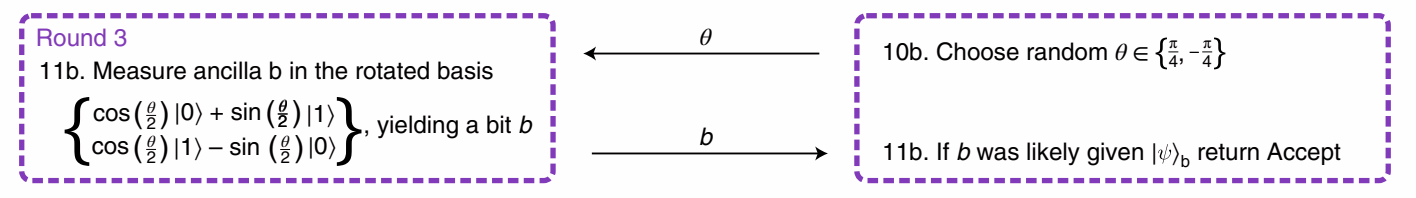

In [ ]:
#10b
# Function to choose a random angle theta step 10 b
def choose_random_theta():
    return np.random.choice([np.pi / 4, -np.pi / 4])

In [ ]:
#11b Prover
@qfunc
def measure_ancilla_in_rotated_basis(ancilla: Qubit):
    theta = choose_random_theta()
    RY(2 * theta)(ancilla)  # Apply rotation to the single ancilla qubit

In [ ]:
#11b Classifier
@qfunc
def round3_process()


SyntaxError: expected ':' (<ipython-input-43-3058c26de086>, line 3)

In [ ]:
def test_round3_process():
    try:
        # Create the model
        model = create_model(round3_process)

        # Synthesize the model
        synthesis_result = synthesize(model)

        print("Model created and synthesized successfully.")
        print(synthesis_result)

    except Exception as e:
        print(f"An error occurred: {e}")

test_round3_process()

An error occurred: name 'round3_process' is not defined
